In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
5**(5/3) * np.pi**(2/3)

31.360520030703444

In [3]:
parsec = 10**8 
Mo = 5*10**(-6)

We will calculate the amplitude in units of distance as 'light-seconds' and masses in 'gravity-seconds'. 

Unit coversions used are:

$1 parsec = 10^8 sc$

$1 M_0 = 5 * 10^{-6} s c^3 /G$

The amplitude then can be written as (tkupker+[2018])
$$ A = \frac{2*((M/M_0) * 5 * 10^{-6})^{5/3}}{(d/1pc)*10^8} (\pi f)^{2/3}$$

Where the $chirp mass M = (m_1 m_2)^{5/3}/(m_1 + m_2)^{1/5}$ is measured in units of solar mass and frequency $f = 2/P_{orb}(sec)$


The characteristic strain is: $h_c = \sqrt{N_{cycle}} A$, where $N_cycle = f T_{obs}$. LISA will be oberational for a $T_{obs} = 4 yrs$

In [4]:
#Function to calculate the characteristic strain:


def characteristic_strain(P,m1,m2,d):
    f = 2/P
    Tobs = 4 * 3.154 * 10**7 #in seconds
    Ncycle = f*Tobs
    
    Mchirp = (m1*m2)**(3/5) / (m1+m2)**(1/5)
    
    A = ((2*(Mchirp * Mo)**(5/3)) * (np.pi * f)**(2/3))/(d *parsec)
    
    hc = np.sqrt(Ncycle)*A

    return A/10**(-23),hc;

In [5]:
m1 = np.array([0.55,0.8,0.8,0.8,0.68,0.8,0.49,0.8,0.8,0.67,0.78,0.247,0.312,0.298,0.275,0.54])
m2 = np.array([0.27,0.177,0.161,0.100,0.125,0.085,0.048,0.066,0.064,0.044,0.059,0.49,0.75,0.76,0.76,0.79])
d = np.array([5000,1786,1584,1317,299,1044,276,1338,971,337,347,933,645,1019,299,337])
P = np.array([321.529,569.395,620.21,943.84,1028.73,1085.7,1102.70,1347.35,1375.0,1471.3,1596.4,765.4,1188.0,2389.8,3883.7,4231.8])


In [6]:
A,hc =characteristic_strain(P,m1,m2,d)

In [7]:
#printing the amplitudes

#m1  m2    P    d   A

for i in range(16):
    print(m1[i]," ",m2[i]," ",P[i]," ",d[i]," ",A[i])

0.55   0.27   321.529   5000   6.731393521865726
0.8   0.177   569.395   1786   11.579978682564361
0.8   0.161   620.21   1584   11.28046395439308
0.8   0.1   943.84   1317   6.510150642951895
0.68   0.125   1028.73   299   29.85713206180903
0.8   0.085   1085.7   1044   6.39421665033513
0.49   0.048   1102.7   276   9.77377811747217
0.8   0.066   1347.35   1338   3.3789736813679085
0.8   0.064   1375.0   971   4.45770098370696
0.67   0.044   1471.3   337   7.532930019366988
0.78   0.059   1596.4   347   10.249482108009213
0.247   0.49   765.4   933   17.0882072833625
0.312   0.75   1188.0   645   31.562417375242507
0.298   0.76   2389.8   1019   12.149339283748843
0.275   0.76   3883.7   299   27.846104350653825
0.54   0.79   4231.8   337   43.80498765013029


In [8]:
f = 2/P

In [9]:
dataf = pd.read_json("LISA.json")

strain = np.array([])
frequency = np.array([])

for i in range(dataf.size):
    frequency = np.append(frequency, dataf['data'].to_numpy()[i][0])
    strain = np.append(strain, dataf['data'].to_numpy()[i][1])
    

In [10]:
hc

array([5.96308148e-20, 7.70862241e-20, 7.19504340e-20, 3.36602771e-20,
       1.47867668e-19, 3.08253677e-20, 4.67530154e-20, 1.46224597e-20,
       1.90956929e-20, 3.11952991e-20, 4.07480565e-20, 9.81133518e-20,
       1.45458089e-19, 3.94773253e-20, 7.09769686e-20, 1.06963802e-19])

In [13]:
f[7]

0.0014843952944669167

In [12]:
hc[7]

1.4622459721207442e-20

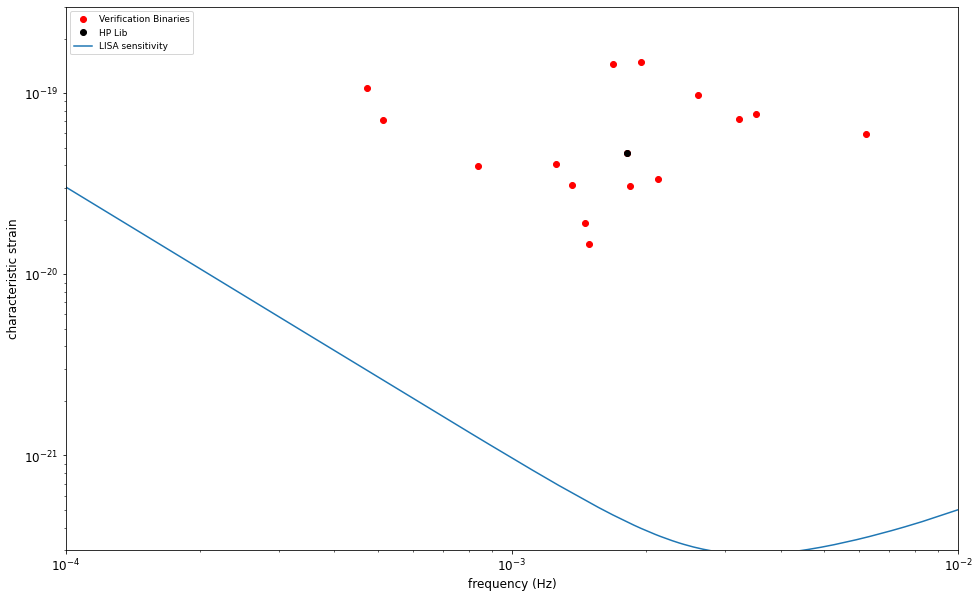

In [22]:
plt.rcParams['font.size'] = 12
plt.figure(figsize=(16,10))
plt.yscale("log")
plt.xscale("log")
plt.plot(f,hc,'ro',label ="Verification Binaries" )
plt.plot(f[6],hc[6],'ko',label='HP Lib')
plt.plot(frequency,strain,label = "LISA sensitivity")
plt.xlim(10**-4,0.01)
plt.ylim(3*10**-22,3*10**-19)
plt.legend(loc = 'upper left',prop={'size': 9})
plt.xlabel("frequency (Hz)")
plt.ylabel("characteristic strain")
plt.title("")
plt.savefig("strain_verific_binary.jpg")

In [24]:
-18-2/3

-18.666666666666668